> # Tensorflow function

In python, we can declare a function so easily. Make a cubic function.

In [1]:
def cube(x):
    return x**3

We can call the function using python interger, float and also tensor.

In [2]:
import tensorflow as tf

print(cube(2))
print(cube(tf.constant(3.0)))

8
tf.Tensor(27.0, shape=(), dtype=float32)


And we also change it to tensorflow function by **tf.function()** method.

In [4]:
tf_cube = tf.function(cube)
tf_cube

This function can be used like original python function and returns same value tensor.

In [5]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

**tf.function** decorator is more widely used.

In [7]:
@tf.function
def tf_cube(x):
    return x**2

We can use original python function by **python_function**.

In [8]:
tf_cube.python_function(2)

4

This tf function optimizes calculation graph. When optimized graph is ready, tf function progress operation in graph in order. So, it is faster than general python function, especially in complex calculation.

When we write custom loss, layers, etc and send use it in keras model, keras automatically transform it to tf function. User's involvement is not needed.

### - Autograph and Tracing

Tensorflow analyzes source code of python function and search all control statements. This step is called autograph. Since python doesn't provide method to search them, tensorflow analyzes source code itself. After analyzing, tensorflow make upgrading version of the function whose control statements are all changed to tensorflow operation(whlie -> **tf.while_loop()**, if -> **tf.cond()**). 

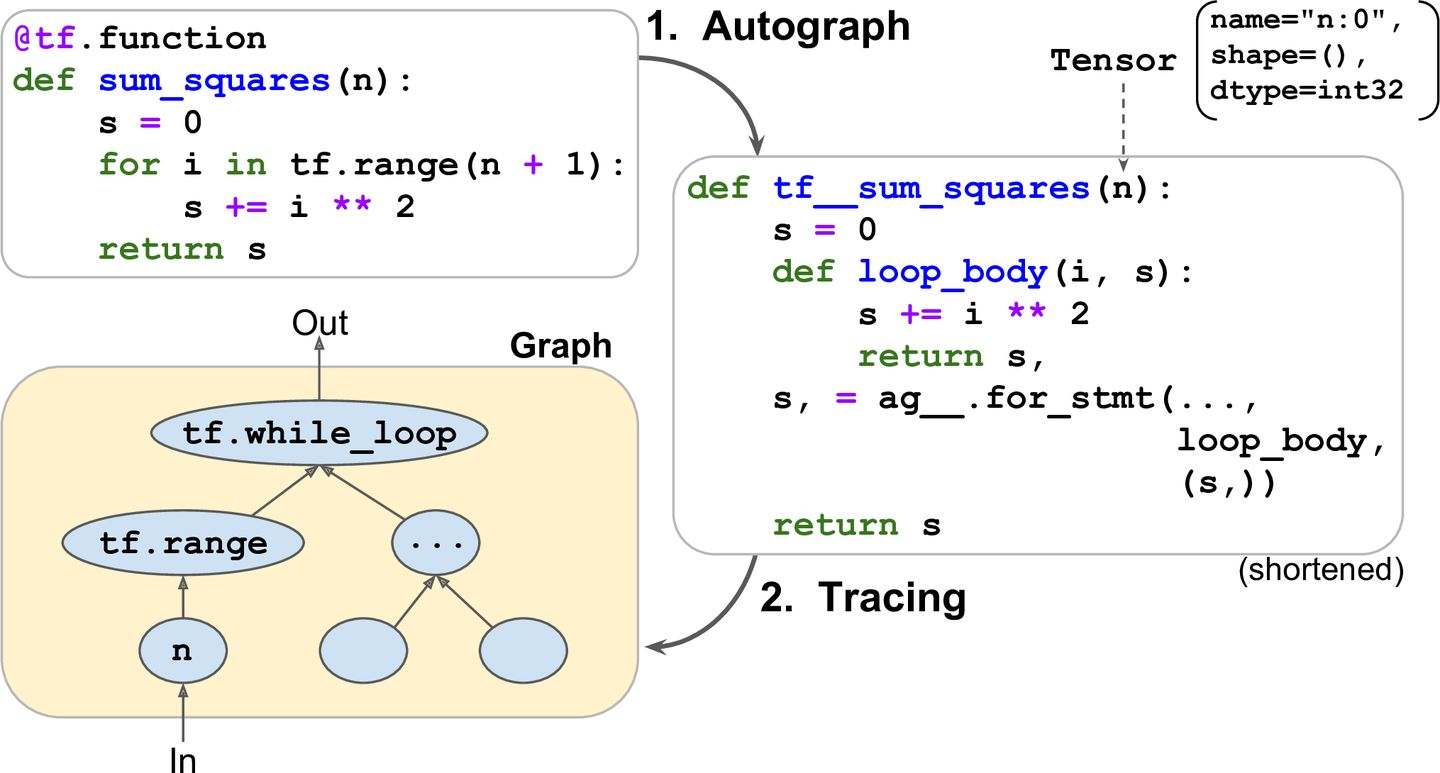

And tensorflow calls this upgraded function. However, it returns symbolic tensor. This tensor doesn't have value just have name, data type and scale. This fuction will processed in graph mode. this means tensorflow operation expresses the operation and adds node at graph to print tensor. Final graph is generated by tracing step. Node means operation nad arrow means tensor.